# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Importing relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visiting the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Creating a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extracting all rows of data
data = soup.find('table', class_ = 'table')
all_rows = data.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Creating empty list
columns = []
list_data_list = []

# Looping through the scraped data to create a list of rows

# looping through the first data in all_rows to get the columns name
for i in range(7):
    columns.append(all_rows[0].find_all('th')[i].text)

# looping from the second data to the end data to extract the datas    
for j in range(1, len(all_rows)):
    # declaring a list to contain the datas
    data_list = []
    # looping within the particular row in the all_rows to extract its data and adding to the list
    for i in range(7):   
        data_list.append(all_rows[j].find_all("td")[i].text)
    # adding the data list to another list to create list of data list
    list_data_list.append(data_list)

In [22]:
# Creating a Pandas DataFrame by using the list of data list and a list of the column names
data_df = pd.DataFrame(list_data_list,columns=columns)


In [24]:
# Confirming DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examining data type of each column
data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [26]:
# Changing data types for data analysis
data_df["terrestrial_date"] = pd.to_datetime(data_df["terrestrial_date"])
data_df[["sol","ls","month"]] = data_df[["sol","ls","month"]].astype(int)
data_df[["min_temp","pressure"]] = data_df[["min_temp","pressure"]].astype(float)


In [27]:
# Confirming type changes were successful by examining data types again
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
data_df["month"].nunique()

12

In [30]:
# 2. How many sols (Martian days) worth of data are there?
data_df["sol"].count()

1867

In [31]:
# 3. What is the average minimum temperature by month?
avg_temp_month = data_df.groupby(["month"])["min_temp"].mean()
avg_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

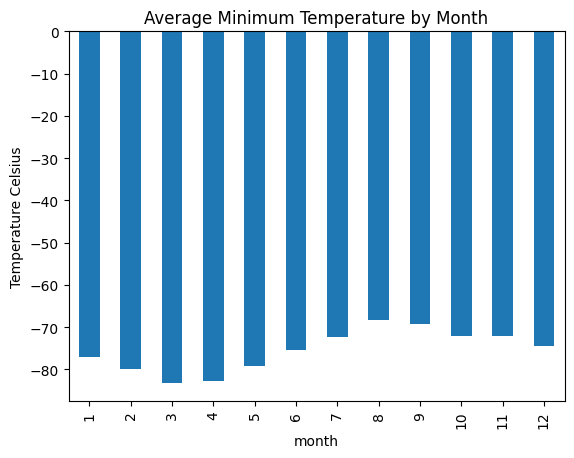

In [32]:
# Ploting the average minimum temperature by month
avg_temp_month.plot.bar()
plt.title("Average Minimum Temperature by Month")
plt.ylabel("Temperature Celsius")
plt.show()

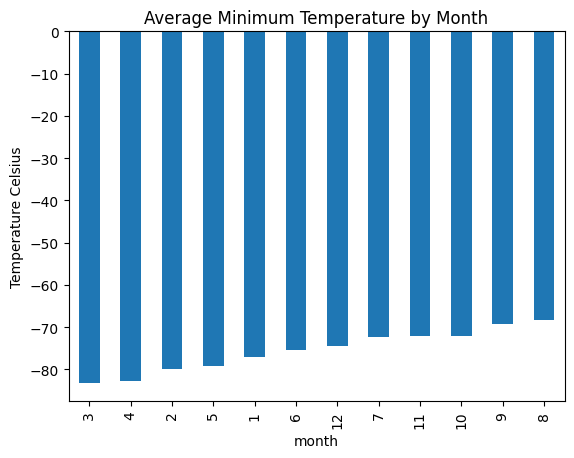

In [33]:
# Identifying the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_temp_month.sort_values().plot.bar()
plt.title("Average Minimum Temperature by Month")
plt.ylabel("Temperature Celsius")
plt.show()

In [35]:
# 4. What is the average pressure by month?
avg_pressure_mth = data_df.groupby(["month"])["pressure"].mean()
avg_pressure_mth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

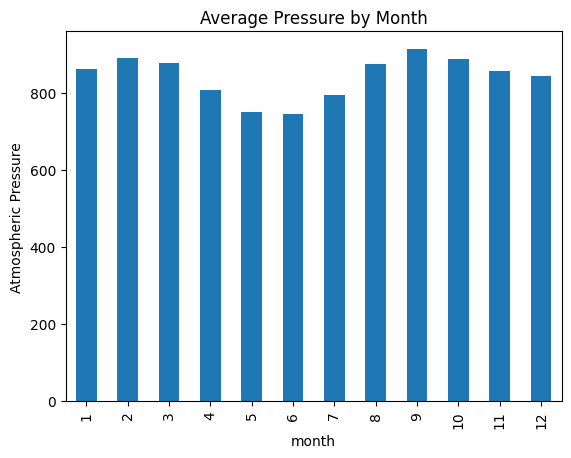

In [36]:
# Ploting the average pressure by month
avg_pressure_mth.plot.bar()
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

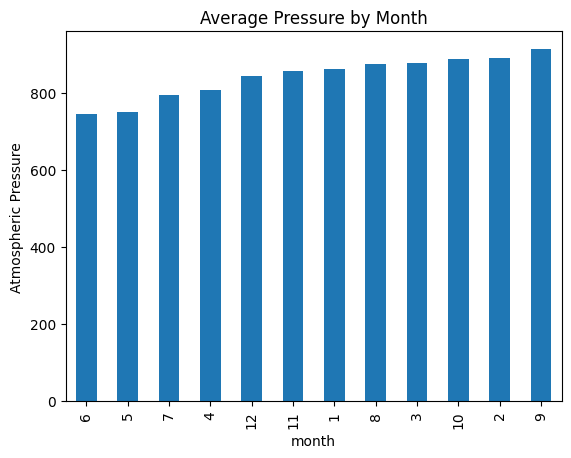

In [37]:
# Identifying the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_mth.sort_values().plot.bar()
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

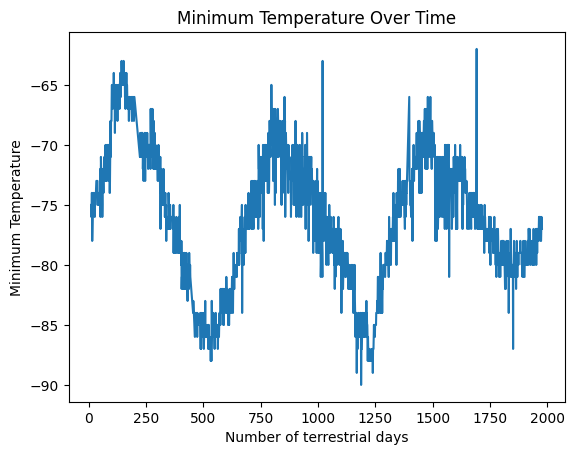

In [58]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(data_df['sol'], data_df['min_temp'])
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")
plt.show()


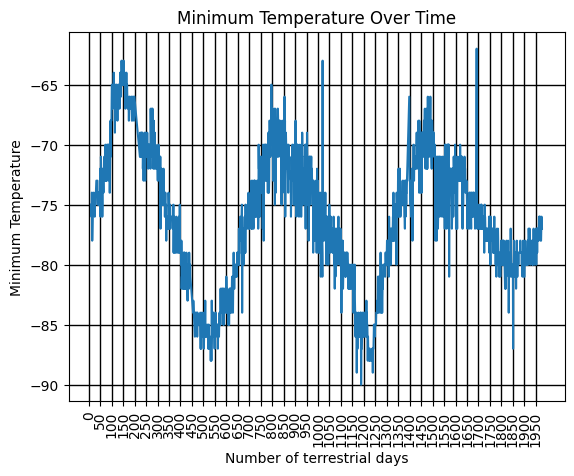

In [59]:
# lets plot the previous data again using the grid in the graph to estimate the Martial days
# The calculation and explanation in on the alaysis section.
plt.plot(data_df['sol'], data_df['min_temp'])
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")

plt.grid(True)
plt.grid(which='major', linestyle='-', linewidth=1.0, color='black')
plt.xticks(range(0, 2000, 50), rotation = 90)  

plt.show()


# Minimum Temperature

### Analysis
We have plotted the graph for the average minimum temperature by month and observed the following patterns:
- There is a decrease in the average minimum temperature from the first to the third month.
- From the third to the eighth month, the temperature increases.
- From the eighth to the twelfth month, the average minimum temperature decreases again.
### Conclusion 
We have plotted the same graph in sorted form in the following section to draw the following conclusions:
1. The coldest month is the 3rd month.
2. The hottest month is the 8th month.

# Atmospheric Pressure

### Analysis 
Similarly, from the graph of average pressure by month, we can observe the following patterns:
- The average atmospheric pressure increases from the first to the second month, and then gradually decreases until the 6th month. After that, there is a significant increase in pressure up to the 9th month. Finally, the pressure decreases gradually until we reach the 12th month.

### Conclusion
After analyzing the graph, we can draw the following conclusions:
1. The month with the lowest pressure is the 6th month.
2. The month with the highest pressure is the 9th month.

# Year Length

### Analysis
- To determine the length of a Martian year, we can refer to the gridded bar representing the minimum temperature over time. From the dataframe we created, we can see that for the number of elapsed sols (Martian days) with a value of 10, the minimum temperature is -75, which is also reflected in the graph. To find how many terrestrial (Earth) days are in a Martian year, we look at the graph from the beginning until it repeats. From the gridded graph, we can see that the graph repeats when the number of terrestrial days is in the range of 650 to 700. Upon closer inspection, it is approximately 700. By subtracting the starting point at 10 days from the point where it repeats at around 700 days, we get a value of 690. Hence, we can conclude that a Martian year has approximately 690 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
data_df.to_csv("mars_weather_data.csv")

In [22]:
browser.quit()